## A Gentle Guide to the world of disruptive deep learning audio applications and architectures.
1. [State-of-the-Art Techniques](https://ketanhdoshi.github.io/Audio-Intro/) — this article (What is sound and how it is digitized. What problems is audio deep learning solving in our daily lives. What are Spectrograms and why they are all-important.)
2. [Why Mel Spectrograms perform better](https://ketanhdoshi.github.io/Audio-Mel/) (Processing audio data in Python. What are Mel Spectrograms and how to generate them)
3. [Feature Optimization and Augmentation](https://ketanhdoshi.github.io/Audio-Augment/) (Enhance Spectrograms features for optimal performance by hyper-parameter tuning and data augmentation)
4. [Audio Classification](https://ketanhdoshi.github.io/Audio-Classification/) (End-to-end example and architecture to classify ordinary sounds. Foundational application for a range of scenarios.)
5. [Automatic Speech Recognition](https://ketanhdoshi.github.io/Audio-ASR/) (Speech-to-Text algorithm and architecture, using CTC Loss and Decoding for aligning sequences.)

### What is sound?
We all remember from school that a sound signal is produced by variations in air pressure. We can measure the intensity of the pressure variations and plot those measurements over time.

Sound signals often repeat at regular intervals so that each wave has the same shape. The height shows the intensity of the sound and is known as the amplitude.

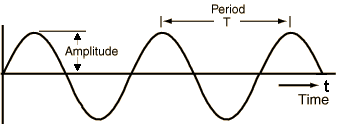

The time taken for the signal to complete one full wave is the period. The number of waves made by the signal in one second is called the frequency. The frequency is the reciprocal of the period. The unit of frequency is Hertz.
The majority of sounds we encounter may not follow such simple and regular periodic patterns. But signals of different frequencies can be added together to create composite signals with more complex repeating patterns.

### How do we represent sound digitally?
To digitize a sound wave we must turn the signal into a series of numbers so that we can input it into our models. This is done by measuring the amplitude of the sound at fixed intervals of time.

Sample measurements at regular time intervals
https://commons.wikimedia.org/wiki/File:Signal_Sampling.png

Each such measurement is called a sample, and the sample rate is the number of samples per second. For instance, a common sampling rate is about 44,100 samples per second. That means that a 10-second music clip would have 441,000 samples!

### Preparing audio data for a deep learning model
What is more interesting is that, with deep learning, we don’t actually deal with audio data in its raw form. Instead, the common approach used is to convert the audio data into images and then use a standard CNN architecture to process those images! Really? Convert sound into pictures? That sounds like science fiction.
This is done by generating Spectrograms from the audio. So first let’s learn what a Spectrum is, and use that to understand Spectrograms.

#### Spectrum
As we discussed earlier, signals of different frequencies can be added together to create composite signals, representing any sound that occurs in the real-world. This means that any signal consists of many distinct frequencies and can be expressed as the sum of those frequencies.
The Spectrum is the set of frequencies that are combined together to produce a signal. eg. the picture shows the spectrum of a piece of music.
The Spectrum plots all of the frequencies that are present in the signal along with the strength or amplitude of each frequency.
Spectrum showing the frequencies that make up a sound signal (![Source](https://www.sfu.ca/sonic-studio-webdav/handbook/Graphics/Spectrum2.gif), 

by permission of Prof Barry Truax)
The lowest frequency in a signal called the fundamental frequency. Frequencies that are whole number multiples of the fundamental frequency are known as harmonics.
For instance, if the fundamental frequency is 200 Hz, then its harmonic frequencies are 400 Hz, 600 Hz, and so on.

#### Time Domain vs Frequency Domain
The Spectrum is an alternate way to represent the same signal. It shows Amplitude against Frequency, and since the x-axis shows the range of frequency values of the signal, at a moment in time, we are viewing the signal in the Frequency Domain.

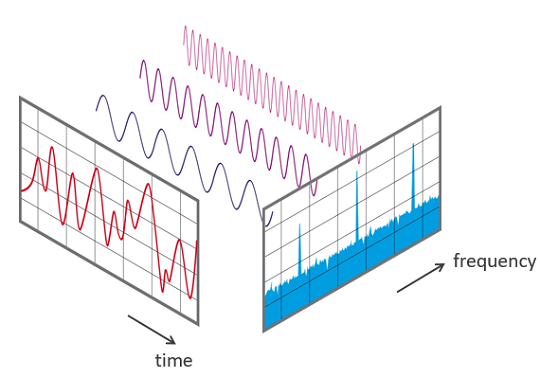

#### Spectrograms
Since a signal produces different sounds as it varies over time, its constituent frequencies also vary with time. In other words, its Spectrum varies with time.

A Spectrogram of a signal plots its Spectrum over time and is like a ‘photograph’ of the signal. It plots Time on the x-axis and Frequency on the y-axis. It is as though we took the Spectrum again and again at different instances in time, and then joined them all together into a single plot.
It uses different colors to indicate the Amplitude or strength of each frequency. The brighter the color the higher the energy of the signal. Each vertical ‘slice’ of the Spectrogram is essentially the Spectrum of the signal at that instant in time and shows how the signal strength is distributed in every frequency found in the signal at that instant.

In the example below, the first picture displays the signal in the Time domain ie. Amplitude vs Time. It gives us a sense of how loud or quiet a clip is at any point in time, but it gives us very little information about which frequencies are present.
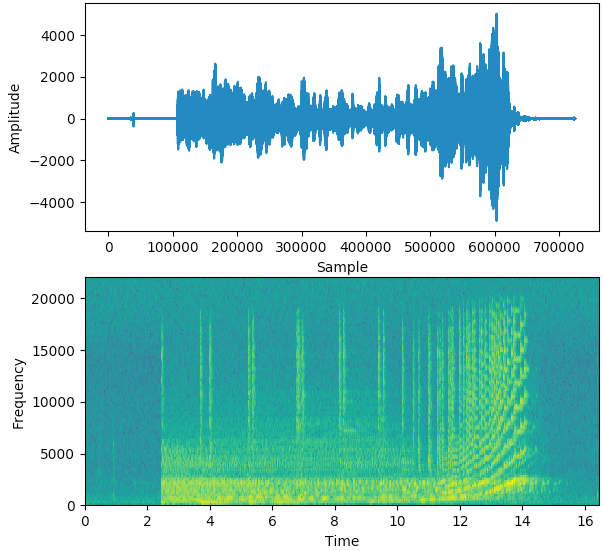

The second picture is the Spectrogram and displays the signal in the Frequency domain.

#### Generating Spectrograms
Spectrograms are produced using Fourier Transforms to decompose any signal into its constituent frequencies. If this makes you a little nervous because we have now forgotten all that we learned about Fourier Transforms during college, don’t worry 😄! We won’t actually need to recall all the mathematics, there are very convenient Python library functions that can generate spectrograms for us in a single step. We’ll see those in the next article.

#### Audio Deep Learning Models
Now that we understand what a Spectrogram is, we realize that it is an equivalent compact representation of an audio signal, somewhat like a ‘fingerprint’ of the signal. It is an elegant way to capture the essential features of audio data as an image.

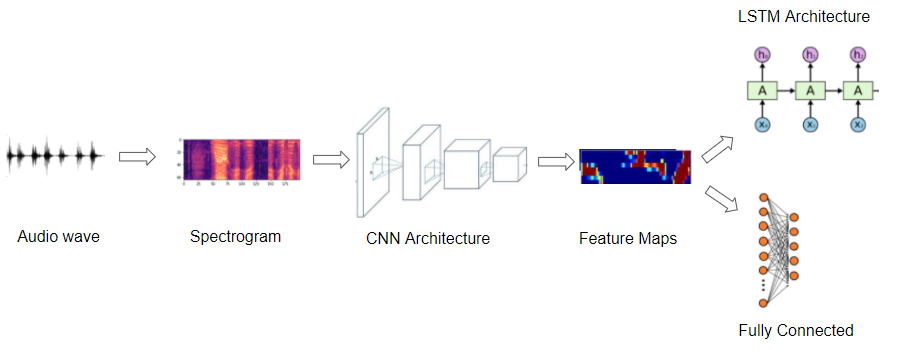

So most deep learning audio applications use Spectrograms to represent audio. They usually follow a procedure like this:

1. Start with raw audio data in the form of a wave file.
2. Convert the audio data into its corresponding spectrogram.
3. Optionally, use simple audio processing techniques to augment the spectrogram data. (Some augmentation or cleaning can also be done on the raw audio data before the spectrogram conversion)
4. Now that we have image data, we can use standard CNN architectures to process them and extract feature maps that are an encoded representation of the spectrogram image.
The next step is to generate output predictions from this encoded representation, depending on the problem that you are trying to solve.

- For instance, for an audio classification problem, you would pass this through a Classifier usually consisting of some fully connected Linear layers.
- For a Speech-to-Text problem, you could pass it through some RNN layers to extract text sentences from this encoded representation.

#### What problems does audio deep learning solve?

##### Speech to Text and Text to Speech
When dealing with human speech, we can go a step further, and not just recognize the speaker, but understand what they are saying. This involves extracting the words from the audio, in the language in which it is spoken and transcribing it into text sentences.

This is one of the most challenging applications because it deals not just with analyzing audio, but also with NLP and requires developing some basic language capability to decipher distinct words from the uttered sounds.

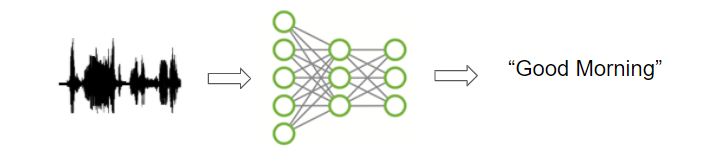




## Why Mel Spectrograms perform better

### Audio File Formats and Python Libraries
Audio data for your deep learning models will usually start out as digital audio files. From listening to sound recordings and music, we all know that these files are stored in a variety of formats based on how the sound is compressed. Examples of these formats are .wav, .mp3, .wma, .aac, .flac and many more.

Python has some great libraries for audio processing. Librosa is one of the most popular and has an extensive set of features. scipy is also commonly used. If you are using Pytorch, it has a companion library called torchaudio that is tightly integrated with Pytorch. It doesn’t have as much functionality as Librosa, but it is built specifically for deep learning.

They all let you read audio files in different formats. The first step is to load the file. With librosa:

Or, you can also do the same thing using scipy:

You can then visualize the sound wave:

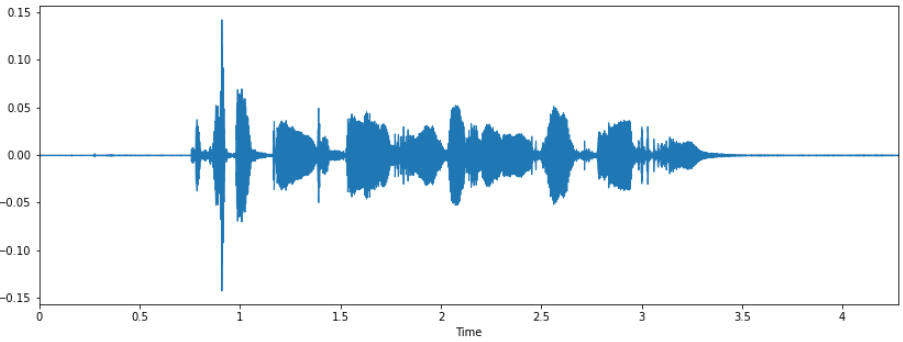

### Audio Signal Data
As we saw in the previous article, audio data is obtained by sampling the sound wave at regular time intervals and measuring the intensity or amplitude of the wave at each sample. The metadata for that audio tells us the sampling rate which is the number of samples per second.
`When that audio is saved in a file it is in a compressed format. When the file is loaded, it is decompressed and converted into a Numpy array. This array looks the same no matter which file format you started with.`
In memory, audio is represented as a time series of numbers, representing the amplitude at each timestep. For instance, if the sample rate was 16800, a one-second clip of audio would have 16800 numbers. Since the measurements are taken at fixed intervals of time, the data contains only the amplitude numbers and not the time values. Given the sample rate, we can figure out at what time instant each amplitude number measurement was taken.

The bit-depth tells us how many possible values those amplitude measurements for each sample can take. For example, a bit-depth of 16 means that the amplitude number can be between 0 and 65535 (2 ¹⁶ — 1). The bit-depth influences the resolution of the audio measurement — the higher the bit-depth, the better the audio fidelity.

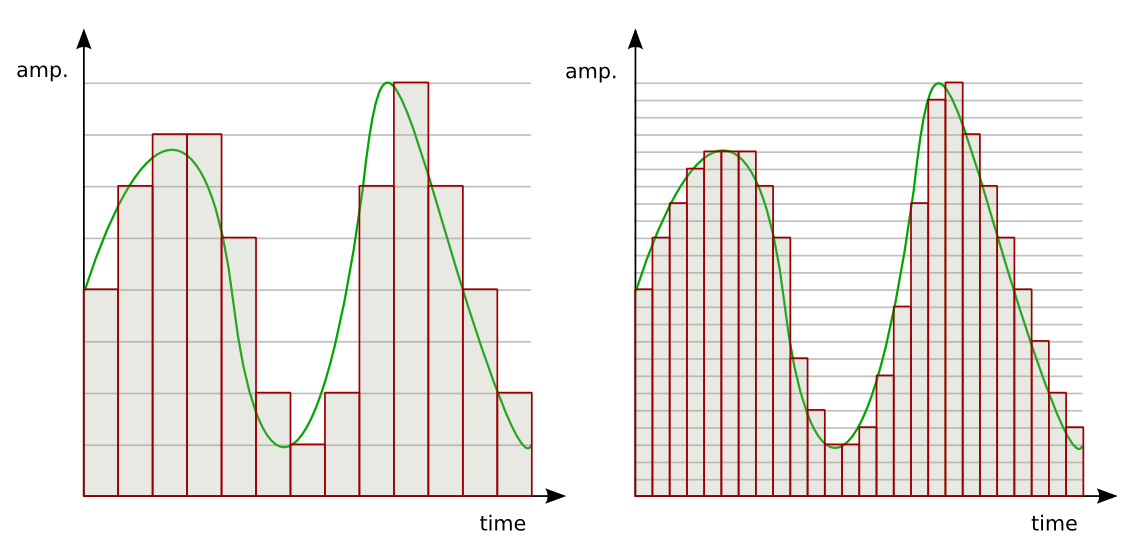

### Spectrograms
Deep learning models rarely take this raw audio directly as input. As we learned in Part 1, the common practice is to convert the audio into a spectrogram. The spectrogram is a concise ‘snapshot’ of an audio wave and since it is an image, it is well suited to being input to CNN-based architectures developed for handling images.

